# Data Exploration of Hotel Reservation Cancellation Data.

In [92]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [93]:
# load the dataset
df = pd.read_parquet("../data/hotel_bookings.parquet")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [95]:
# shape
df.shape

(119390, 32)

In [96]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Obseravation

- most of the column names are self exploratory
- lead_time: amount of time that passes from the start of a process until its conclusion
- agent :  Booking was done through Agent
- compnay : Booking was done through Company
- adr : Average Daily Rate

### Summary of the Dataset

In [97]:
def summary(df):
    print(f"data shape: {df.shape}")
    summ = pd.DataFrame(df.dtypes, columns=["data types"])
    summ["#missing"] = df.isna().sum().values
    summ["%missing"] = df.isnull().sum().values / len(df) * 100
    summ["#unique"] = df.nunique().values
    desc = pd.DataFrame(df.describe(include="all").transpose())
    summ["min"] = desc["min"].values
    summ["max"] = desc["max"].values

    return summ


summary(df).style.background_gradient(cmap="Blues")

data shape: (119390, 32)


,data types,#missing,%missing,#unique,min,max
hotel,object,0,0.000000,2,nan,nan
is_canceled,int64,0,0.000000,2,0.000000,1.000000
lead_time,int64,0,0.000000,479,0.000000,737.000000
arrival_date_year,int64,0,0.000000,3,2015.000000,2017.000000
arrival_date_month,object,0,0.000000,12,nan,nan
arrival_date_week_number,int64,0,0.000000,53,1.000000,53.000000
arrival_date_day_of_month,int64,0,0.000000,31,1.000000,31.000000
stays_in_weekend_nights,int64,0,0.000000,17,0.000000,19.000000
stays_in_week_nights,int64,0,0.000000,35,0.000000,50.000000
adults,int64,0,0.000000,14,0.000000,55.000000


### Columns with null values and how to deal with them

- children: NaN will be replace by 0
- agent: NaN will be replaced by 0
- company : NaN will be replaced by 0
- country: NaN will be replaced by 0 

In [98]:
df["children"] = df.children.fillna(0)
df["agent"] = df.agent.fillna(0)
df["company"] = df.company.fillna(0)
df["country"] = df.country.fillna("Unknown")

In [99]:
# distribution of the target variable
np.bincount(df.is_canceled)

array([75166, 44224], dtype=int64)

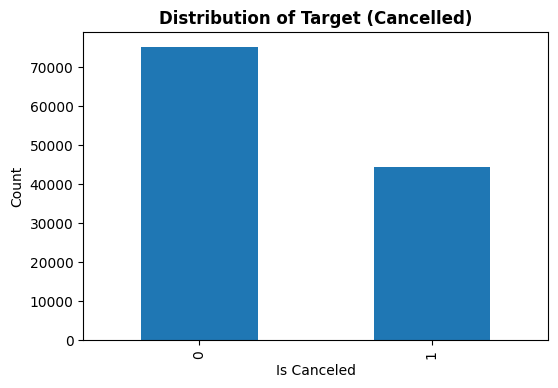

In [100]:
plt.figure(figsize=(6, 4))
df.is_canceled.value_counts().plot(kind="bar")
plt.title("Distribution of Target (Cancelled)", fontweight="bold")
plt.xlabel("Is Canceled")
plt.ylabel("Count")
plt.show()

The target distribution is not highly imbalenced

# EDA

###  Correlation Plot




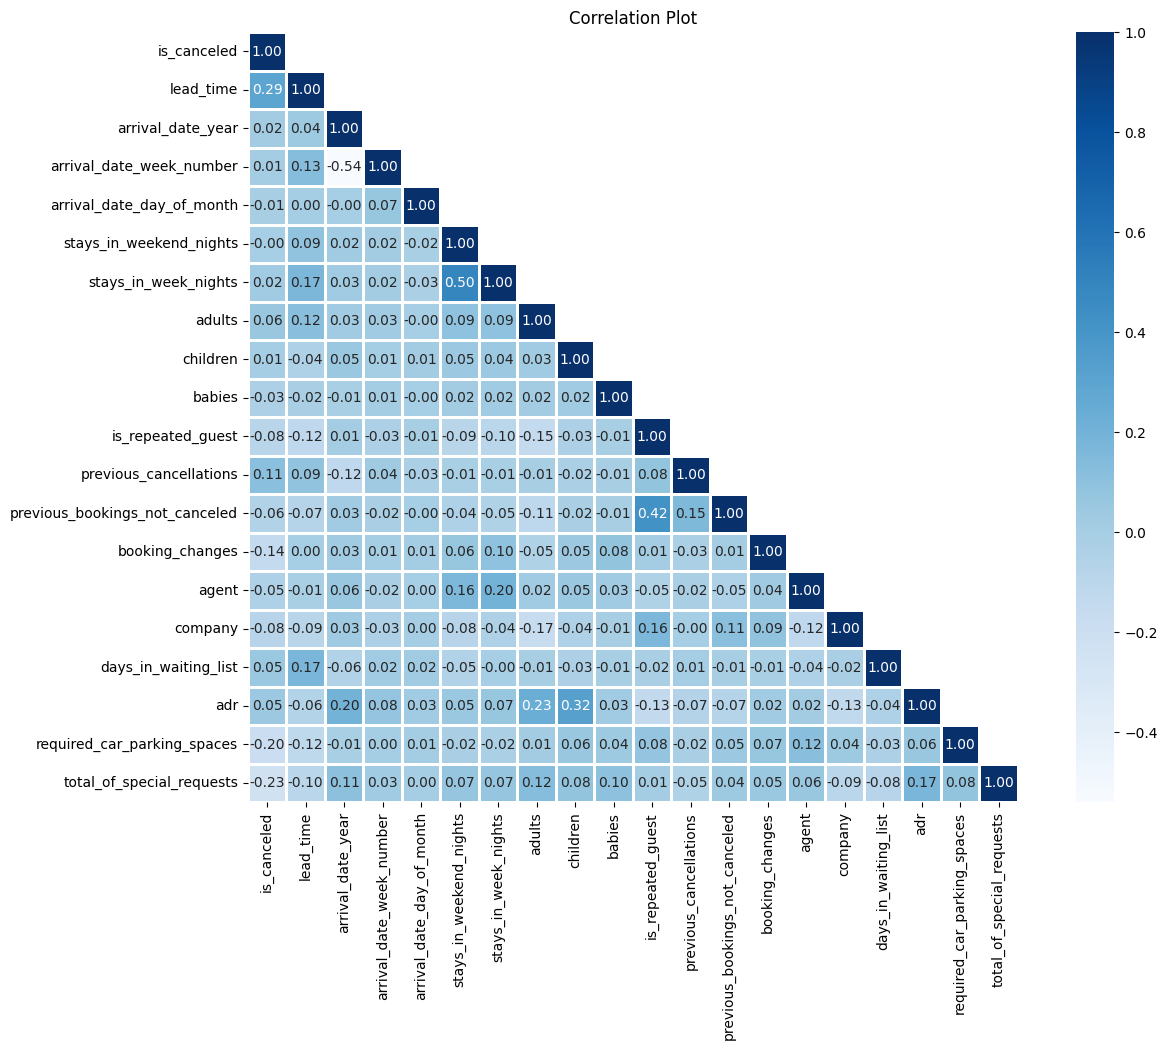

In [112]:
def correlation_plot(df):
    plt.figure(figsize=(15, 10))
    corr = df.select_dtypes("number").corr()
    mask = np.triu(np.ones_like(corr), k=1)
    sns.heatmap(
        corr,
        cmap="Blues",
        annot=True,
        fmt=".2f",
        linewidth=1,
        square=True,
        mask=mask,
    )
    plt.title("Correlation Plot")
    plt.show()


correlation_plot(df)

### Box plot

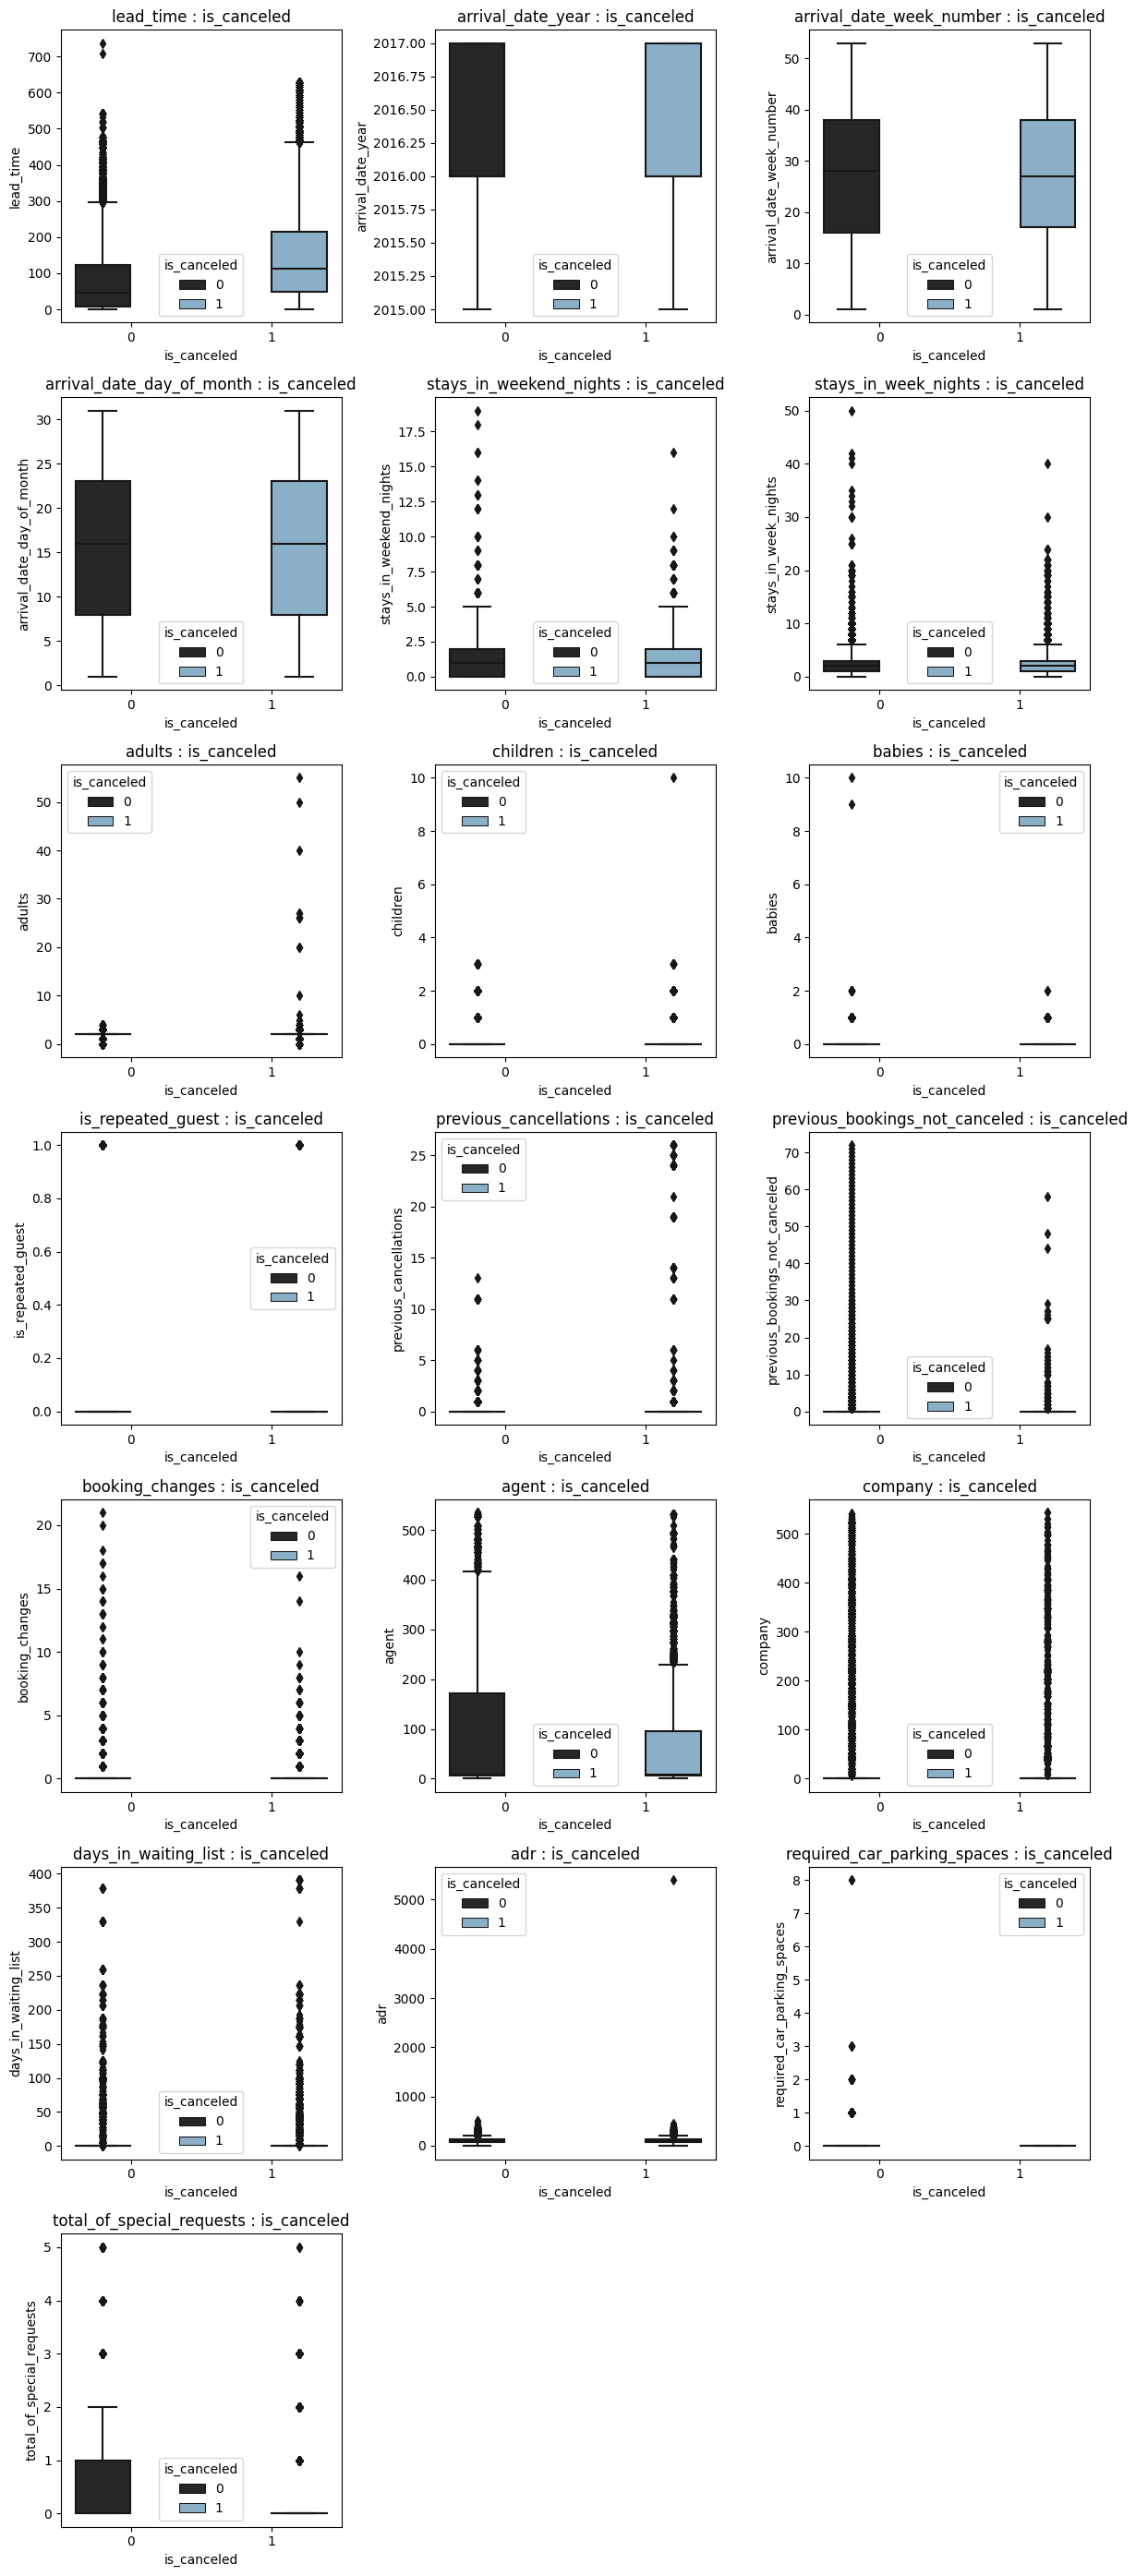

In [117]:
def multiple_box_plot(df, target):
    numerical_df = df.select_dtypes(include="number")
    num_cols = 3
    num_rows = int(numerical_df.shape[1] / 3) + 1
    plt.figure(figsize=(12, num_rows * 4))
    for idx, column in enumerate(numerical_df.drop(columns=target).columns):
        plt.subplot(num_rows, num_cols, idx % (num_cols * num_rows) + 1)
        plt.title(f"{column} : {target}")
        plt.ylabel(column)
        sns.boxplot(x=target, y=column, data=df, palette="dark:#82B0D2", hue=target)
    plt.tight_layout()
    plt.show()


multiple_box_plot(df, "is_canceled")

In [78]:
categorical_columns = [f for f in df.columns if df[f].dtype == "O"]
print(f"Total Number of categorical columns are : {len(categorical_columns)}")
categorical_columns

Total Number of categorical columns are : 12


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [79]:
numerical_columns = [f for f in df.columns if df[f].dtype != "O"]
print(f"Total Number of categorical columns are : {len(numerical_columns)}")

Total Number of categorical columns are : 20


## Categorical Variables

### Number of Unique values in categorical Columns

In [80]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["Columns", "Number of Unique Values"]
for c in categorical_columns:
    unique_value = df[c].nunique()
    table.add_row([c, unique_value])
print(table)

+-------------------------+-------------------------+
|         Columns         | Number of Unique Values |
+-------------------------+-------------------------+
|          hotel          |            2            |
|    arrival_date_month   |            12           |
|           meal          |            5            |
|         country         |           178           |
|      market_segment     |            8            |
|   distribution_channel  |            5            |
|    reserved_room_type   |            10           |
|    assigned_room_type   |            12           |
|       deposit_type      |            3            |
|      customer_type      |            4            |
|    reservation_status   |            3            |
| reservation_status_date |           926           |
+-------------------------+-------------------------+


Observation


- country contains 178 unique values, with this amount of unique value. OneHot Encoding will lead to Curse Of Dimentionality. 
Ordianl Encoder or Target Encoder will be better Choice.

- reservation_status will not be used as it is directly correlated to is_cancelled

In [85]:
df.booking_changes.value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

Booking counts have categorical values, it looks like a more of a outlier

### Numerical Distribution

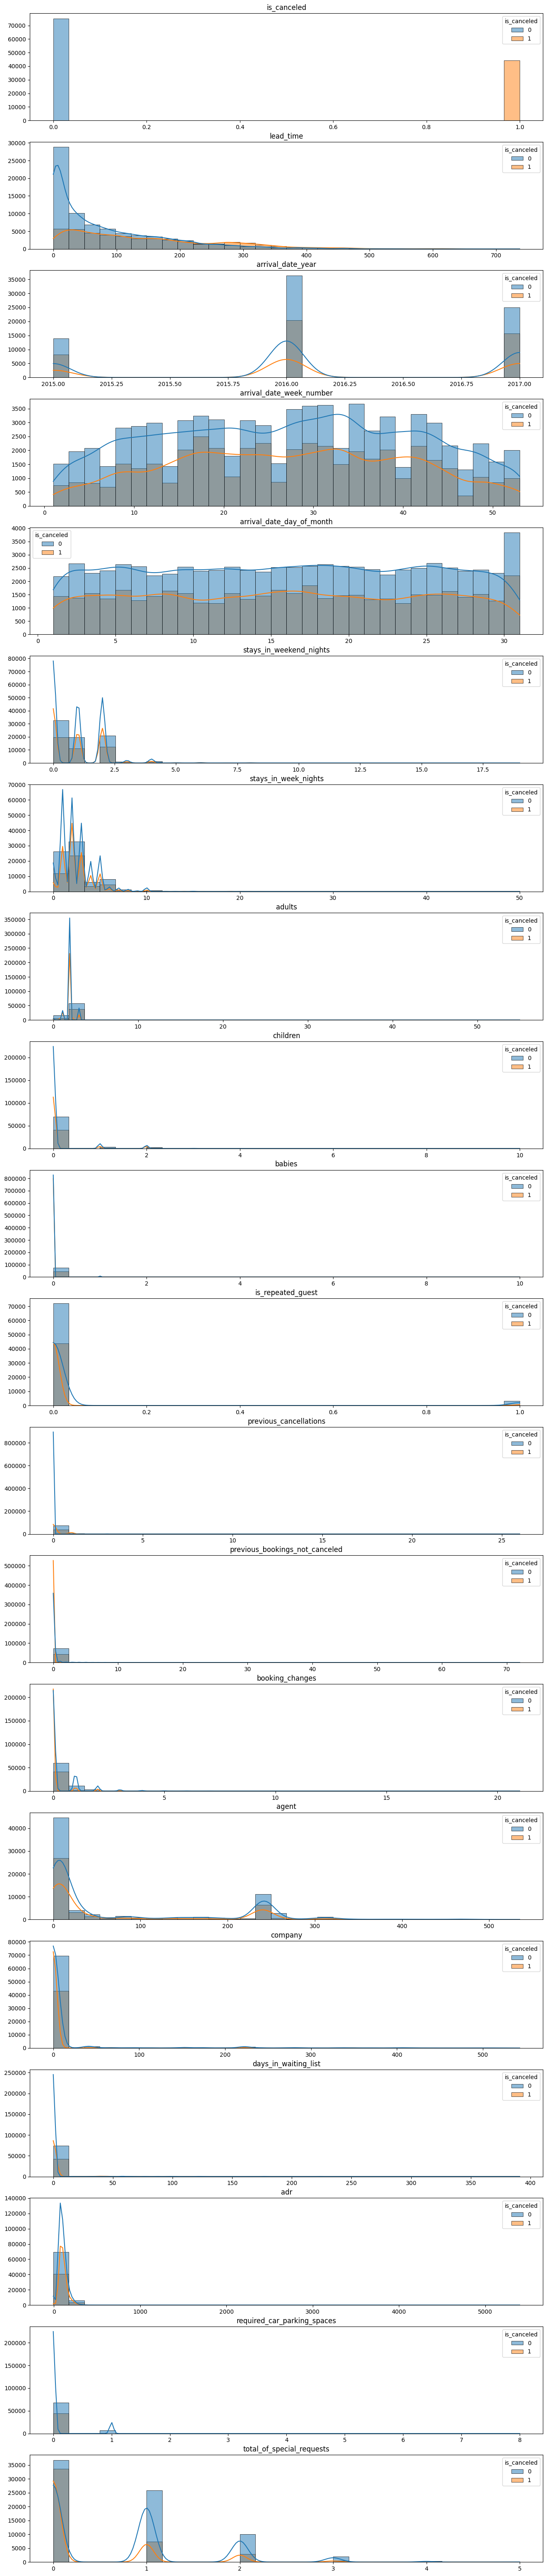

In [120]:
numerical_train = df.select_dtypes(include="number")
fig, axes = plt.subplots(
    numerical_train.shape[1], 1, figsize=(16, len(numerical_train.columns) * 4)
)

for idx, col in enumerate(numerical_train.columns):
    sns.histplot(
        data=numerical_train,
        x=col,
        hue="is_canceled",
        bins=30,
        ax=axes[idx],
        kde=True,
        linewidth=0.5,
        color="lightblue",
    )
    axes[idx].set_title(col)
    axes[idx].set(xlabel="", ylabel="")
plt.show()

### Causality

In [121]:
causal_df = df[["is_canceled", "deposit_type", "reservation_status"]]
causal_df.sample(10)

,is_canceled,deposit_type,reservation_status
21724,0,No Deposit,Check-Out
69290,1,Non Refund,Canceled
32933,0,No Deposit,Check-Out
99396,0,No Deposit,Check-Out
33852,0,No Deposit,Check-Out
22008,0,No Deposit,Check-Out
24316,0,No Deposit,Check-Out
99446,0,No Deposit,Check-Out
76412,0,No Deposit,Check-Out
1008,0,No Deposit,Check-Out


Reservation status is obviously linked to the target ("Canceled")

In [122]:
# check causality between a reservation canceled and Non Refund reservation
is_canceled_df = causal_df.loc[causal_df["deposit_type"] == "Non Refund"]
is_canceled_df["is_canceled"].sum() / len(is_canceled_df)

0.9936244601357374

Almost everytime a deposit wasn't refund, it was because of a cancelation, which indicates causality.

In [124]:
%%latex
$$
encoding_{j} = countTarget1_{j} / totalOccurence_{j} 
$$

<IPython.core.display.Latex object>